<a href="https://colab.research.google.com/github/shivanshgite123/Python-Data-Analysis/blob/main/Food_impact_on_indian_health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# load the dataset
data = pd.read_csv('food_impact_india.csv')

In [11]:
# Display basic info
print("Dataset Shape:", data.shape)
print("\nDataset Columns:\n", data.columns)
print("\nMissing Values:\n", data.isnull().sum())
print("\nData Types:\n", data.dtypes)

Dataset Shape: (17686, 16)

Dataset Columns:
 Index(['Person_ID', 'Age', 'Gender', 'Region', 'Diet_Type', 'Primary_Cuisine',
       'Spice_Level', 'Daily_Calorie_Intake', 'Health_Impact',
       'Common_Diseases', 'Exercise_Level', 'BMI', 'Food_Frequency',
       'Sugar_Intake', 'Salt_Intake', 'Health_Score'],
      dtype='object')

Missing Values:
 Person_ID                   0
Age                         0
Gender                      0
Region                      0
Diet_Type                   0
Primary_Cuisine             0
Spice_Level                 0
Daily_Calorie_Intake        0
Health_Impact               0
Common_Diseases         10649
Exercise_Level              0
BMI                         0
Food_Frequency              0
Sugar_Intake                0
Salt_Intake                 0
Health_Score                0
dtype: int64

Data Types:
 Person_ID                 int64
Age                       int64
Gender                   object
Region                   object
Diet_Type    

In [12]:
#summary Statistics
desc = data.describe()
print(desc)

          Person_ID           Age  Daily_Calorie_Intake           BMI  \
count  17686.000000  17686.000000          17686.000000  17686.000000   
mean    8843.500000     43.477949           2359.039184     29.280080   
std     5105.652766     14.925590            659.713868      6.188532   
min        1.000000     18.000000           1200.000000     18.500000   
25%     4422.250000     31.000000           1791.000000     24.000000   
50%     8843.500000     43.000000           2368.000000     29.300000   
75%    13264.750000     56.000000           2929.000000     34.600000   
max    17686.000000     69.000000           3500.000000     40.000000   

       Food_Frequency  Health_Score  
count    17686.000000  17686.000000  
mean         3.523069     50.711071  
std          1.703098     28.748094  
min          1.000000      1.000000  
25%          2.000000     26.000000  
50%          4.000000     51.000000  
75%          5.000000     76.000000  
max          6.000000    100.000000  


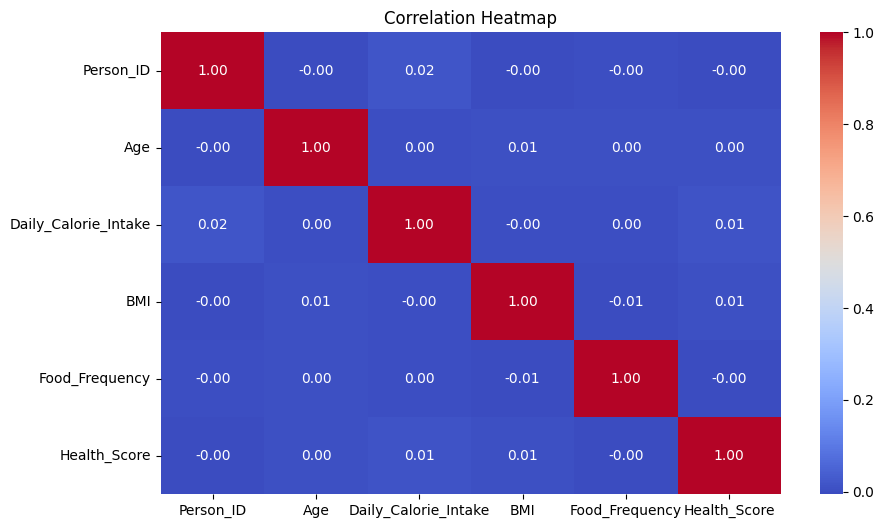

In [13]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
Correlation_matrix = data.corr(numeric_only=True)
sns.heatmap(Correlation_matrix, annot=True, cmap='coolwarm',fmt='.2f',cbar=True)
plt.title('Correlation Heatmap')
plt.show()

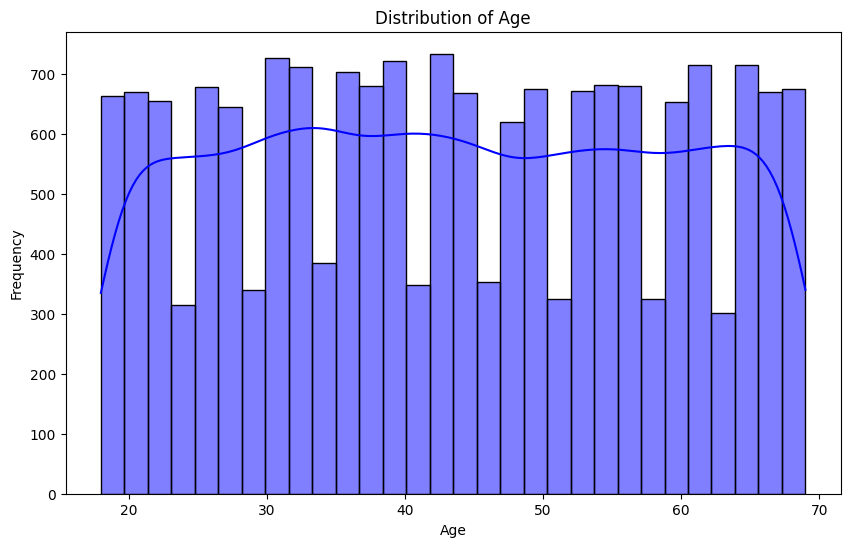

In [14]:
# Distribution of Age
plt.figure(figsize=(10,6))
sns.histplot(data['Age'], bins=30, kde=True, color="blue")
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

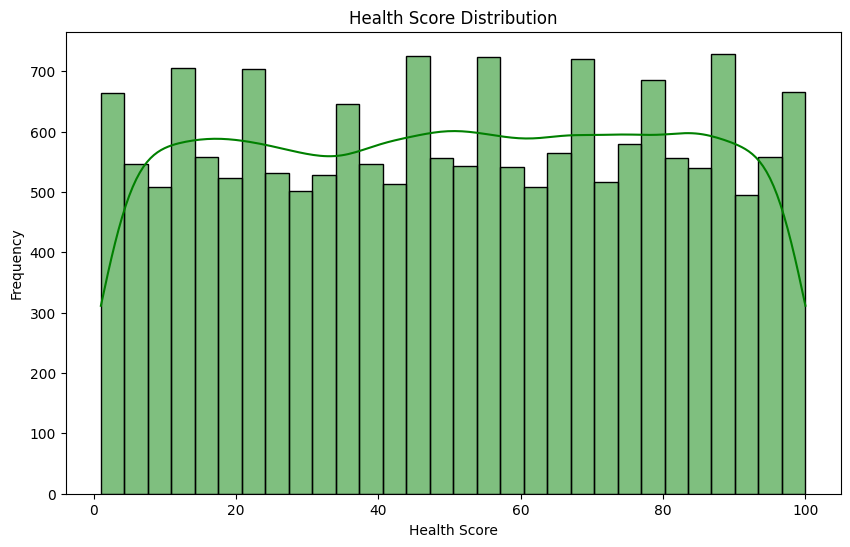

In [17]:
# Health Score Distribution
plt.figure(figsize=(10,6))
sns.histplot(data['Health_Score'], bins=30, kde=True, color="green")
plt.title('Health Score Distribution')
plt.xlabel('Health Score')
plt.ylabel('Frequency')
plt.show()

<ipython-input-18-4c033234093a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Diet_Type'],y=data['BMI'], palette='pastel')


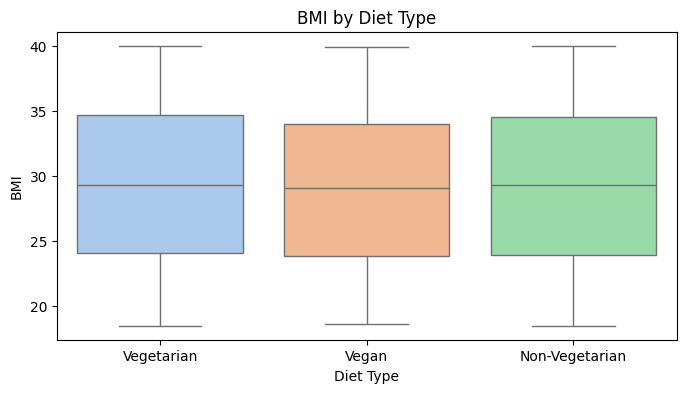

In [18]:
# BMI by Diet Type
plt.figure(figsize=(8,4))
sns.boxplot(x=data['Diet_Type'],y=data['BMI'], palette='pastel')
plt.title('BMI by Diet Type')
plt.xlabel('Diet Type')
plt.ylabel('BMI')
plt.show()

<ipython-input-19-7460cc7513c1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data["Health_Impact"], palette="Set2", order=data["Health_Impact"].value_counts().index)


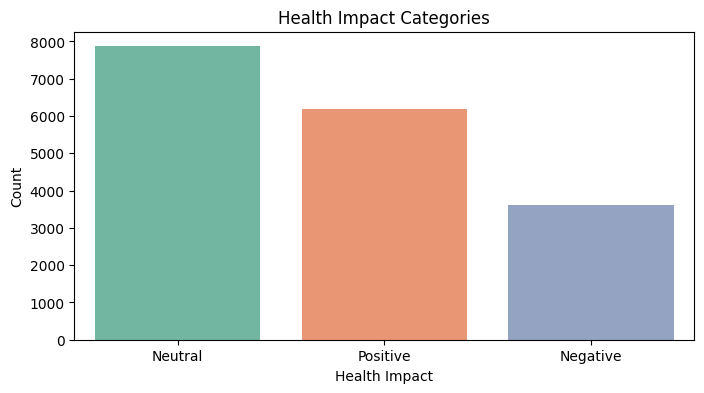

In [19]:
# Countplot for Health Impact
plt.figure(figsize=(8, 4))
sns.countplot(x=data["Health_Impact"], palette="Set2", order=data["Health_Impact"].value_counts().index)
plt.title("Health Impact Categories")
plt.xlabel("Health Impact")
plt.ylabel("Count")
plt.show()

In [20]:
# Creating Age Groups
data['Age_Group'] = pd.cut(data['Age'], bins=[0, 18, 35, 50, 100], labels=["0-18", "19-35", "36-50", "51+"])

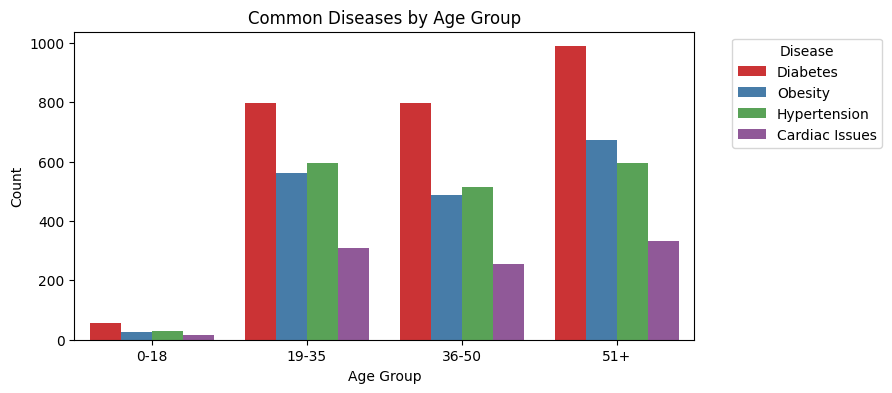

In [21]:
# Common Diseases by Age Group
plt.figure(figsize=(8, 4))
sns.countplot(x="Age_Group", hue="Common_Diseases", data=data, palette="Set1")
plt.title("Common Diseases by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Disease", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

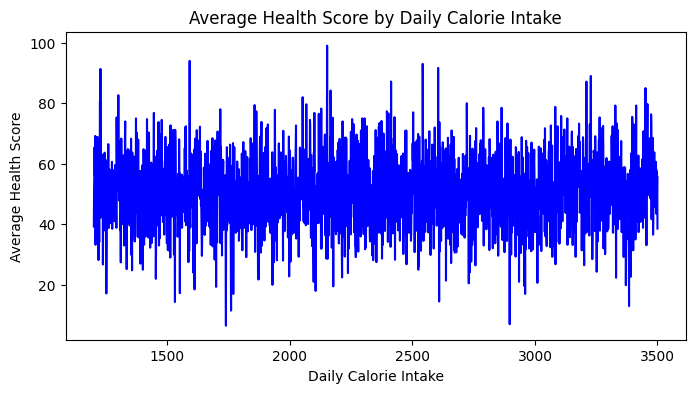

In [26]:
# Relationship between Calorie Intake and Health Score (Line Chart)
plt.figure(figsize=(8, 4))
data_sorted = data.groupby("Daily_Calorie_Intake")["Health_Score"].mean().reset_index()
sns.lineplot(x=data_sorted["Daily_Calorie_Intake"], y=data_sorted["Health_Score"], color="blue")
plt.title("Average Health Score by Daily Calorie Intake")
plt.xlabel("Daily Calorie Intake")
plt.ylabel("Average Health Score")
plt.show()
